In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import json
import os 
import csv
import sys

In [0]:
#load training and test data
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Try1/train/train_set.json') as json_file:
    data_train = json.load(json_file)
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Try1/train/test_set.json') as json_file:
    data_test = json.load(json_file)

Define input and output data from train and test set

In [0]:
#store input and output data
raw_x_data_train=data_train[0]
y_data_train=data_train[1]

raw_x_data_test=data_test[0]
y_data_test=data_test[1]

In [0]:
print(raw_x_data_train)

[[19.026297590440446, 11.0, 4.47213595499958, 0.0, 5.385164807134504, 12.041594578792296, 19.0, 12.165525060596439, 7.211102550927978, 4.0, 6.4031242374328485, 11.40175425099138, 16.1245154965971, 5.0990195135927845, 0.0, 5.0990195135927845, 16.278820596099706, 7.0710678118654755, 4.0, 7.0710678118654755, 20.09975124224178, 12.0, 5.0990195135927845, 0.0, 5.385164807134504, 12.041594578792296, 19.0, 13.601470508735444, 8.48528137423857, 7.0710678118654755, 8.602325267042627, 13.0, 17.029386365926403, 5.0990195135927845, 0.0, 6.082762530298219, 17.11724276862369, 6.324555320336759, 1.0, 5.0990195135927845, 19.1049731745428, 12.0, 5.0990195135927845, 0.0, 5.0990195135927845, 12.0, 18.110770276274835, 13.0, 7.810249675906654, 6.0, 7.810249675906654, 13.0, 17.11724276862369, 5.0990195135927845, 0.0, 5.0990195135927845, 16.0312195418814, 6.4031242374328485, 3.0, 6.4031242374328485], [16.55294535724685, 10.04987562112089, 4.123105625617661, 0.0, 5.0990195135927845, 10.04987562112089, 16.15549

In [0]:
print(y_data_train)

[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1]]


In [0]:
#size of inputs(number of videos) train and test set
size_train=len(raw_x_data_train)
size_test=len(raw_x_data_test)
print(size_train)
print(size_test)

12
3


In [0]:
#find maximum length of array in train and test set
rows = [] 
frames=[] 
# reading csv file 
with open('/content/drive/My Drive/Colab Notebooks/Our Projects/Try1/data/data_file.csv',"r",encoding="utf8") as csvfile: 
    # creating a csv reader object 
    csvreader = csv.reader(csvfile) 
    # extracting each data row one by one 
    for row in csvreader: 
        rows.append(row)
        frames.append(row[3])     
maxSize=int(max(frames))
print(maxSize)
maxSize=maxSize*20
print(maxSize)

9
180


In [0]:
#define the size for train and test array with padding
r1, c1 = (size_train, maxSize)
r2,c2 = (size_test, maxSize)
print(r1,c1)
print(r2,c2)
x_data_train= [[0 for i in range(c1)] for j in range(r1)]
x_data_test= [[0 for i in range(c2)] for j in range(r2)]

12 180
3 180


In [0]:
print(frames)

['3', '5', '4', '4', '9', '7', '9', '9', '9', '7', '8', '7', '4', '8', '7']


In [0]:
for i in range(size_train):
    frames20=int(frames[i])*20
    print(frames20)

60
100
80
80
180
140
180
180
180
140
160
140


In [0]:
for i in range(size_test):
    frames20=int(frames[i+size_train])*20
    print(frames20)

80
160
140


In [0]:
#create arrays with padding
for i in range(size_train):
   frames20=int(frames[i])*20
   for j in range(frames20):
        x_data_train[i][j]=raw_x_data_train[i][j]
print(x_data_train)
for i in range(size_test):
   frames20=int(frames[i+size_train])*20
   for j in range(frames20):
        x_data_test[i][j]=raw_x_data_test[i][j]
print(x_data_test)

[[19.026297590440446, 11.0, 4.47213595499958, 0.0, 5.385164807134504, 12.041594578792296, 19.0, 12.165525060596439, 7.211102550927978, 4.0, 6.4031242374328485, 11.40175425099138, 16.1245154965971, 5.0990195135927845, 0.0, 5.0990195135927845, 16.278820596099706, 7.0710678118654755, 4.0, 7.0710678118654755, 20.09975124224178, 12.0, 5.0990195135927845, 0.0, 5.385164807134504, 12.041594578792296, 19.0, 13.601470508735444, 8.48528137423857, 7.0710678118654755, 8.602325267042627, 13.0, 17.029386365926403, 5.0990195135927845, 0.0, 6.082762530298219, 17.11724276862369, 6.324555320336759, 1.0, 5.0990195135927845, 19.1049731745428, 12.0, 5.0990195135927845, 0.0, 5.0990195135927845, 12.0, 18.110770276274835, 13.0, 7.810249675906654, 6.0, 7.810249675906654, 13.0, 17.11724276862369, 5.0990195135927845, 0.0, 5.0990195135927845, 16.0312195418814, 6.4031242374328485, 3.0, 6.4031242374328485, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Only for LSTM

In [0]:
x1=[]
y1=[]
x11=[]
y11=[]

x2=[]
y2=[]
x22=[]
y22=[]
for i in range(len(x_data_train)):
  x1.append(x_data_train[i])
  x11.append(x1)
  x1=[]

for i in range(len(y_data_train)):
  y1.append(y_data_train[i])
  y11.append(y1)
  y1=[]

for i in range(len(x_data_test)):
  x2.append(x_data_test[i])
  x22.append(x2)
  x2=[]

for i in range(len(y_data_test)):
  y2.append(y_data_test[i])
  y22.append(y2)
  y2=[]
  
x_data_train=np.array(x11)
y_data_train=np.array(y11)
x_data_test=np.array(x22)
y_data_test=np.array(y22)
print(y_data_train)


[[[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]]


In [0]:

print(y_data_train)



[[[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[1 0 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 1 0]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]

 [[0 0 1]]]


In [0]:
print(y_data_train)

[[[1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [0 1 0]
  [0 1 0]
  [0 1 0]
  [0 1 0]
  [0 0 1]
  [0 0 1]
  [0 0 1]
  [0 0 1]]]


In [0]:
#import libraries for training
from keras import models
from keras import layers
from keras.optimizers import RMSprop, SGD

Using TensorFlow backend.


Create model and train the dataset using LSTM (change)

In [0]:
network2=models.Sequential()
network2.add(layers.LSTM(2048, return_sequences=True,input_shape=(1,180),dropout=0.5))
network2.add(layers.Dense(512, activation='sigmoid'))
#network2.add(layers.Dropout(0.5))
network2.add(layers.Dense(3, activation='softmax'))
opt = SGD(lr=0.05)
network2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
network2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 2048)           18259968  
_________________________________________________________________
dense_5 (Dense)              (None, 1, 512)            1049088   
_________________________________________________________________
dense_6 (Dense)              (None, 1, 3)              1539      
Total params: 19,310,595
Trainable params: 19,310,595
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = network2.fit(x_data_train, y_data_train, epochs=50, batch_size=2, validation_data=(x_data_test, y_data_test))

Train on 12 samples, validate on 3 samples
Epoch 1/50
12/12 [==============================] - 3s 224ms/step - loss: 3.6232 - acc: 0.2500 - val_loss: 2.9179 - val_acc: 0.3333
Epoch 2/50
12/12 [==============================] - 0s 13ms/step - loss: 2.6702 - acc: 0.5000 - val_loss: 1.5345 - val_acc: 0.3333
Epoch 3/50
12/12 [==============================] - 0s 13ms/step - loss: 1.1002 - acc: 0.5000 - val_loss: 1.3415 - val_acc: 0.6667
Epoch 4/50
12/12 [==============================] - 0s 12ms/step - loss: 2.1742 - acc: 0.3333 - val_loss: 1.2813 - val_acc: 0.6667
Epoch 5/50
12/12 [==============================] - 0s 12ms/step - loss: 1.9339 - acc: 0.4167 - val_loss: 0.9854 - val_acc: 0.6667
Epoch 6/50
12/12 [==============================] - 0s 13ms/step - loss: 2.0021 - acc: 0.4167 - val_loss: 0.7858 - val_acc: 0.6667
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 1.7589 - acc: 0.4167 - val_loss: 0.6773 - val_acc: 0.6667
Epoch 8/50
12/12 [=====================

Visualization for LSTM

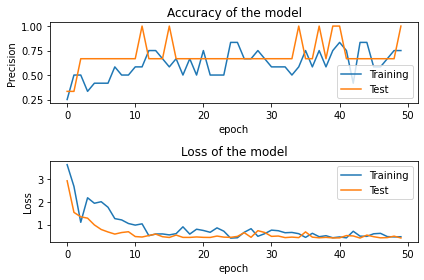

In [0]:
# Visualize
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy of the model')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the model')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Training', 'Test'], loc='upper right')

plt.tight_layout()

plt.show()

In [0]:
#test accuracy
test_loss, test_acc = network2.evaluate(x_data_test, y_data_test)
print('test_acc:', test_acc)

3/3 [==============================] - 0s 2ms/step
test_acc: 1.0


Store the model in json format for LSTM

In [0]:
from keras.models import model_from_json
model_json = network2.to_json()
with open("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_clase.json", "w") as json_file:
    json_file.write(model_json)

Store the weight value for LSTM

In [0]:
network2.save_weights("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_weights_clase.h5")
print("Done")

Done


Prediction for LSTM

In [0]:
from keras.models import model_from_json

json_file = open("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_clase.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/content/drive/My Drive/Colab Notebooks/Our Projects/Try2/train/network_LSTM_weights_clase.h5")
print("Done")

Done


In [0]:
predicted_classes = loaded_model.predict_classes(x_data_test)

In [0]:
print(predicted_classes)
#print(x_data_test[0])
print(np.nonzero(y_data_test[[i]]))

[[0]
 [1]
 [2]]
(array([0]), array([0]), array([0]))


In [0]:
right_predicted=0
wrong_predicted=0

for i in range(len(predicted_classes)):
  if(predicted_classes[i]==np.nonzero(y_data_test[i])):
    right_predicted=right_predicted+1
  else:
    wrong_predicted=wrong_predicted+1

print(right_predicted,"correct classifications")
print(wrong_predicted,"incorrect classification")

ValueError: ignored